In [ ]:
#Scraping Sale section

from datetime import datetime
import json
import requests
import io
response = requests.post('https://app.sakneen.com/apis/marketplace/filters/v2?limit=30&page=1')
x = json.loads(response.text)
pages = x['numberOfPages']
rows=[]
for i in range(1, pages+1):
    response = requests.post('https://app.sakneen.com/apis/marketplace/filters/v2?limit=30&page=' + str(i))
    x = json.loads(response.text)
    rows+=x['data']

dt = datetime.now()
dt = dt.strftime('%Y-%m-%d@%H.%M.%S')
with io.open('Sakneen_Sale_' + str(dt) + '.json', encoding='utf-8', mode = "w") as f:
    f.write("[\n")
    i = 1
    for row in rows:
        x = json.dumps(row, ensure_ascii=False)
        if i != len(rows):
            f.write("\t" + x + ",\n")
        else:
            f.write("\t" + x + "\n")
        i+=1
    f.write("]")
print(len(rows), 'scraped lisitngs.')

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

df = pd.read_csv(r"Sakneen.csv", encoding="utf-8-sig")


,id,finishingType,readyToMove,IsCompound,npv,npvPerMeter,totalPrice,pricePerMeter,deliveryMonth,deliveryYear,...,land,garage,city.nameEnglish,district.nameEnglish,region.nameEnglish,compound.nameEnglish,developer.nameEnglish,financialPlan.downPayment,financialPlan.numberOfYears,financialPlan.monthlyPayment
0,6140f16601328387fa3845fa,ff,1,1,6250000,21186,6250000,21186,5,2021,...,295,1,Giza,6th October City,Greater Cairo,District One,sakneen temp,6250000,0,0
1,615c81237a8f276abcd8b32d,ff,1,1,5000000,22422,5000000,22422,10,2021,...,223,1,Giza,6th October City,Greater Cairo,Carnell Park,NaN,5000000,0,0
2,601820ca520b210011f7eaff,ff,1,0,4500000,22959,4500000,22959,1,2020,...,196,0,Cairo,Zamalek,Greater Cairo,NaN,NaN,4500000,0,0
3,603521024aefbb0011e42d29,ff,1,0,3850000,30556,3850000,30556,1,2020,...,126,0,Cairo,Maadi,Greater Cairo,NaN,NaN,3850000,0,0
4,60758126e2455200128c8f6f,ff,1,1,2500000,15625,2500000,15625,12,2020,...,320,1,Giza,6th October City,Greater Cairo,joud compound,NaN,2500000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,618c0ef250988ed12f690ac1,ff,1,1,24000000,36036,24000000,36036,1,2021,...,879,1,Cairo,New Cairo,Greater Cairo,Villar,NaN,24000000,0,0
996,61c08f38c945558b837fdc89,ff,1,1,4250000,16732,4250000,16732,1,2021,...,254,1,Giza,6th October City,Greater Cairo,Mountain View Giza Plateau,NaN,4250000,0,0
997,61eff66aec1836507dc952fa,ff,1,0,2500000,14286,2500000,14286,1,2021,...,1,0,Giza,Mohandessin,Greater Cairo,NaN,NaN,2500000,0,0
998,6189380bc9d894e71c0b4a8e,ff,1,0,5600000,18667,5600000,18667,1,2021,...,300,1,Cairo,Zamalek,Greater Cairo,NaN,NaN,5600000,0,0


linear model


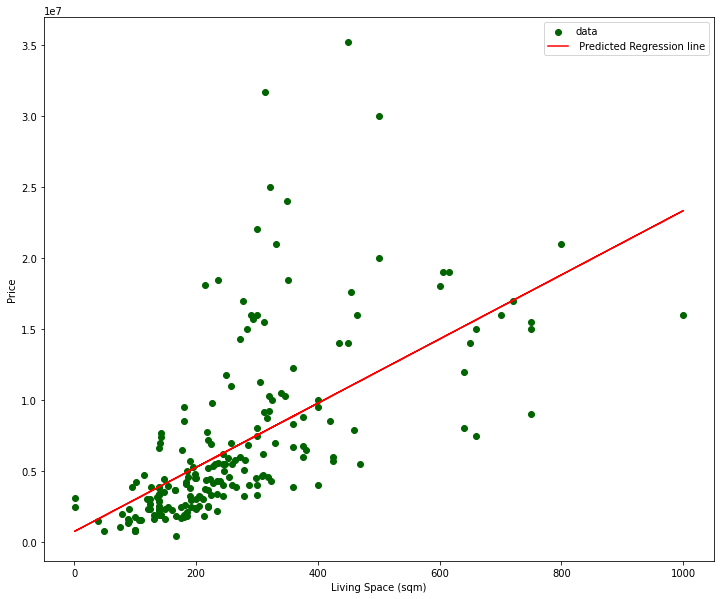

In [3]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['bua']).reshape(-1,1)
y_train=np.array(train_data['totalPrice']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['bua']).reshape(-1,1)
y_test=np.array(test_data['totalPrice']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)

_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqm)')
plt.ylabel('Price')
plt.legend()

In [4]:
# Linear Model
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['bua']).reshape(-1,1)
y_train=np.array(train_data['totalPrice']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['bua']).reshape(-1,1)
y_test=np.array(test_data['totalPrice']).reshape(-1,1)
pred=reg.predict(x_test)
mean_squared_error=metrics.mean_squared_error(y_test,pred)

#print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
#print('R squared training',round(reg.score(x_train,y_train),3))
#print('R sqaured testing',round(reg.score(x_test,y_test),3) )
#print('intercept',reg.intercept_)
#print('coefficient',reg.coef_)

linear model
Sqaured mean error 4804398.44
R squared training 0.458
R sqaured testing 0.391
intercept [734809.30636396]
coefficient [[22594.00184119]]


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

df.sort_values("bua", inplace=True)
train_df.sort_values("bua", inplace=True)
test_df.sort_values("bua", inplace=True)

x_linear_regression = df["bua"].values.reshape(-1,1)
x_linear_regression_training = train_df["bua"].values.reshape(-1,1)
x_linear_regression_testing = test_df["bua"].values.reshape(-1,1)

x_multilinear_regression = df[ ["bua", "land", "IsCompound"] ]
x_multilinear_regression_training = train_df[ ["bua", "garage", "IsCompound"] ].values
x_multilinear_regression_testing = test_df[ ["bua", "garage", "IsCompound"] ].values

poly_multi_columns = [ "bua", "garage", "IsCompound", "land", "unitType" ]
poly = PolynomialFeatures(degree = 2) 
x_polynomial = df[ poly_multi_columns ]
x_polynomial = poly.fit_transform(x_polynomial)
x_polynomial_multi_training = train_df[ poly_multi_columns ].values
x_polynomial_multi_testing = test_df[ poly_multi_columns ].values
x_polynomial_multi_training = poly.fit_transform(x_polynomial_multi_training)
x_polynomial_multi_testing = poly.fit_transform(x_polynomial_multi_testing)

y = df["totalPrice"].values.reshape(-1, 1)
y_training = train_df["totalPrice"].values.reshape(-1, 1)
y_testing = test_df["totalPrice"].values.reshape(-1, 1)

model_poly=LinearRegression()   #build polynomial multi regression model
model_poly.fit(x_polynomial_multi_training,y_training)  #fitting the training data
predicted_poly=model_poly.predict(x_polynomial_multi_testing) #testing our model’s performance

plt.scatter(x_linear_regression, y)
plt.title("Polynomial Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area sqm")
plt.plot(x_linear_regression,model_poly.predict(x_polynomial),color="k")
plt.show()

ValueError: could not convert string to float: 'apartment'